# Enter Student Name & ID

In [ ]:
student_id = 400101356  #@param {type:"integer"}
student_name = "Ali Soltani" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400101356
your name: Ali Soltani




```
# This is formatted as code
```

## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [ ]:
import numpy as np

In [ ]:
def myPCA(X, num_components):

   # Center the data by subtracting the mean along each feature
    X_centered = X - np.mean(X, axis=0)

    # Compute the covariance matrix
    cov_matrix = np.cov(X_centered, rowvar=False)

    # Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Sort eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top 'num_components' eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :num_components]

    # Project the data onto the selected eigenvectors
    reduced_data = np.dot(X_centered, selected_eigenvectors)

    return reduced_data


### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [26]:
import matplotlib as plt
from sklearn.datasets import load_iris

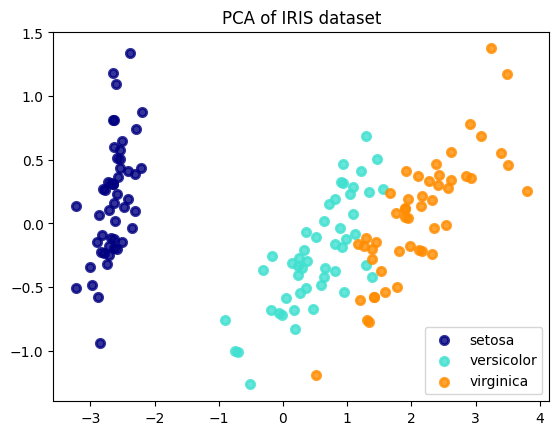

In [ ]:
# myPCA on IRIS

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Plot the results
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")
plt.show()


## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `

Let's delve into eigenfaces and their connection to Principal Component Analysis (PCA).

**Eigenfaces:**
- Eigenfaces are a set of eigenvectors derived from the covariance matrix of face images. These eigenvectors represent the most significant variations in facial features across a dataset.
- Each eigenface captures a specific facial feature or pattern, such as lighting conditions, pose, or expressions.
- Eigenfaces are often used for face recognition, reconstruction, and dimensionality reduction.

**How Eigenfaces Relate to PCA:**
1. **Data Matrix:**
   - Suppose we have a dataset of face images represented as a matrix **X**, where each row corresponds to an image and each column represents a pixel value.
   - The goal is to find a lower-dimensional representation of these face images while preserving the essential information.

2. **Covariance Matrix:**
   - We compute the covariance matrix **C** from the centered data matrix **X** (subtract the mean from each column).
   - The covariance matrix captures the relationships between different pixels (features) in the face images.

3. **Eigenvalues and Eigenvectors:**
   - We find the eigenvalues and eigenvectors of the covariance matrix **C**.
   - The eigenvectors represent the directions (principal components) along which the data varies the most.
   - Eigenvalues indicate the importance of each eigenvector.

4. **Eigenfaces:**
   - The eigenvectors (sorted by eigenvalues) are the eigenfaces.
   - Each eigenface corresponds to a specific facial variation (e.g., lighting, pose).
   - The first few eigenfaces capture the most significant variations in the dataset.

5. **Dimensionality Reduction:**
   - We can project the original face images onto the eigenfaces (eigenvectors) to obtain a lower-dimensional representation.
   - By selecting only the top-k eigenfaces (where k is much smaller than the original dimension), we reduce the dimensionality of the data.
   - This reduced representation can be used for tasks like face recognition or reconstruction.

In summary, eigenfaces are the eigenvectors obtained from PCA applied to face image data. They provide a compact representation of facial features, allowing us to reduce dimensionality while preserving essential information.



On the other hand we can say:

### 2.2 Read the given dataset and create train and test matrices.
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [13]:
#pip install opencv-python

import os
import glob
import cv2
import numpy as np

In [6]:
import cv2
import os
import numpy as np

# Specify the path to the dataset (adjust as needed)
dataset_path = "/content/drive/MyDrive/Colab Notebooks/ORL"

# Initialize empty lists for train and test data
X_train, X_test = [], []
y_train, y_test = [], []

# Iterate through each person's folder
for person_folder in os.listdir(dataset_path):
    person_folder_path = os.path.join(dataset_path, person_folder)
    if os.path.isdir(person_folder_path):
        images = os.listdir(person_folder_path)
        images.sort()  # Sort images to ensure consistent order

        # Use the first five images for training
        for i in range(5):
            image_path = os.path.join(person_folder_path, images[i])
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
            X_train.append(img)
            y_train.append(person_folder)  # Label for training data

        # Use the next five images for testing
        for i in range(5, 10):
            image_path = os.path.join(person_folder_path, images[i])
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            X_test.append(img)
            y_test.append(person_folder)  # Label for test data

# Convert lists to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Print the shapes of the train and test data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (200, 48, 48)
y_train shape: (200,)
X_test shape: (200, 48, 48)
y_test shape: (200,)


In [14]:
# Create lists to store images and corresponding labels
train_imgs = []
train_lbls = []
test_imgs = []
test_lbls = []

# Get the list of subject directories
subject_dirs = sorted(os.listdir('/content/drive/MyDrive/Colab Notebooks/ORL'))

# Loop through each directory (each corresponding to an individual)
for label, dir_name in enumerate(subject_dirs):
    dir_path = os.path.join(dataset_dir, dir_name)

    # Get all image file paths in the directory
    img_files = sorted(glob.glob(os.path.join(dir_path, '*.bmp')))

    # Divide image paths into training and testing sets
    train_files, test_files = img_files[:5], img_files[5:]

    # Load, process images, and add them to the corresponding lists
    preprocessed_imgs = []
    for file_path in train_files:
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            preprocessed_imgs.append(img.flatten())
    train_imgs.extend(preprocessed_imgs)
    lbls_train = [label] * len(train_files)
    train_lbls.extend(lbls_train)
    preprocessed_imgs = []
    for file_path in test_files:
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            preprocessed_imgs.append(img.flatten())
    test_imgs.extend(preprocessed_imgs)
    lbls_test = [label] * len(test_files)
    test_lbls.extend(lbls_test)

# Transform lists to numpy arrays
X_train = np.array(train_imgs)
y_train = np.array(train_lbls)
X_test = np.array(test_imgs)
y_test = np.array(test_lbls)

# Output the shapes of the arrays to confirm the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (200, 2304)
y_train shape: (200,)
X_test shape: (200, 2304)
y_test shape: (200,)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [19]:
# Standardizing data
pca = PCA(n_components=46)
pca_X_train = pca.fit_transform((X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0))
pca_X_test = pca.transform((X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0))

# Verify the transformation by shapes of the arrays
print(f'shape of X_train_pca : {pca_X_train.shape}')
print(f'shape of X_test_pca : {pca_X_test.shape}')

shape of X_train_pca : (200, 46)
shape of X_test_pca : (200, 46)


### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [24]:
lda = LDA()
lda.fit(pca_X_train, y_train)
print(f'Accuracy: {accuracy_score(y_test, lda.predict(pca_X_test)) * 100}%')

Accuracy: 94.5%


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


Accuracy: 92.5%,Dimension: 40
Accuracy: 95.0%,Dimension: 45
Accuracy: 94.5%,Dimension: 50
Accuracy: 95.5%,Dimension: 55
Accuracy: 93.0%,Dimension: 60
Accuracy: 93.5%,Dimension: 65
Accuracy: 93.5%,Dimension: 70
Accuracy: 94.5%,Dimension: 75
Accuracy: 94.0%,Dimension: 80
Accuracy: 95.0%,Dimension: 85
Accuracy: 95.5%,Dimension: 90
Accuracy: 94.0%,Dimension: 95
Accuracy: 94.0%,Dimension: 100
in 55 dimensions we have Maximum Accuracy: 0.955 


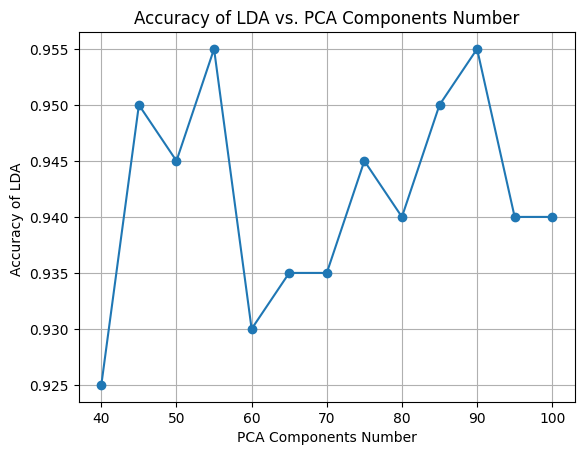

In [95]:
import matplotlib.pyplot as plt

# Loop through the range of dimensions and save the outcomes
dims = list(range(40, 101, 5))
outcomes = []

for dim in dims:
    pca = PCA(n_components=dim)
    # Standardize the data
    pca_X_train = pca.fit_transform((X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0))
    pca_X_test = pca.transform((X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0))

    lda = LDA()
    lda.fit(pca_X_train, y_train)
    print(f'Accuracy: {accuracy_score(y_test, lda.predict(pca_X_test)) * 100}%,Dimension: {dim}')
    outcomes.append((dim, accuracy_score(y_test, lda.predict(pca_X_test))))

max_accuracy = max(outcomes, key=lambda x: x[1])
print(f'in {max_accuracy[0]} dimensions we have Maximum Accuracy: {max_accuracy[1]:} ')


# Plot the outcomes
dims, accuracies = zip(*outcomes)
plt.figure
plt.plot(dims, accuracies, marker='o')
plt.title('Accuracy of LDA vs. PCA Components Number')
plt.xlabel('PCA Components Number')
plt.ylabel('Accuracy of LDA ')
plt.grid(True)
plt.show()

The findings indicate that the optimal accuracy, 0.955, is reached with 55 components. Utilizing too few components may result in underfitting, while an excessive number of components can lead to increased computational costs and potential overfitting. The accompanying plot demonstrates these effects distinctly.

## In-Depth Analysis of PCA Component Count Effects on Model Accuracy:

#### Retention of Variance:
 - **Numerous Components:** Incorporating more components in PCA captures a larger share of the data's original variance, preserving more details. This often enhances model accuracy by retaining critical information.

 - **Few Components:** A smaller number of components means significant information loss, as PCA selects only the most impactful features. This can exclude essential data, potentially lowering model accuracy.


#### Balancing Overfitting and Underfitting:
 - **Numerous Components:** Including too many components can lead to overfitting, where the model learns noise and intricate details from the training data, reducing its ability to generalize to new data.

 - **Few Components:** Retaining too few components may cause underfitting, where the model is too simple to capture the complexities of the data, resulting in poor performance on both training and test datasets.


#### Computational Factors:
 - **Numerous Components:** More components increase the computational load and memory usage, slowing down the training process and complicating scalability to large datasets.

 - **Few Components:** Fewer components decrease computational demands, accelerating the training process and enhancing scalability. This is particularly advantageous for large datasets or real-time applications.


#### Noise Reduction:
 - **Numerous Components:** Including many components can reintroduce noise into the model, which PCA aims to minimize. This noise can negatively impact model performance.

 - **Few Components:** Selecting fewer components helps reduce noise, potentially leading to a cleaner and more accurate model. However, it's crucial to ensure the retained components adequately describe the data.


#### Model Interpretability:
- **Numerous Components:** A model with many components can become complex and harder to interpret, making it challenging to discern input-output relationships.

- **Few Components:** Fewer components simplify the model, enhancing interpretability and understanding. This is essential in fields where model transparency and explainability are critical.


#### Domain-Specific Needs:
 - **Numerous Components:** In areas like image or speech recognition, retaining more components may be necessary to capture subtle features.

 - **Few Components:** In domains such as medical or financial applications, fewer components may be sufficient to capture essential patterns without overly complicating the model.


#### Conclusion:
Choosing the number of PCA components requires balancing variance preservation with dimensionality reduction. Experimenting with different component numbers and using cross-validation helps find the optimal balance. Tools like scree plots, explained variance plots, and cumulative variance can assist in making this decision. The aim is to retain enough components to accurately capture the data's structure while avoiding overfitting, reducing noise, and ensuring computational efficiency.